In [333]:
import pandas as pd
import matplotlib.pyplot as plt

## Cálculo de carga para cada nodo (+/-)

In [334]:
df_prod = pd.read_csv('dataset/mean_production.csv') #el dataset de producción de sustdata 
df_cons = pd.read_csv('results/consum_25.csv') #es el único que está bien, con datos y con columna h
df_cons.head()

,Pavg,iid,datetime,h
0,2524.484150,25,2013-04-06,0.0
1,300.692617,25,2013-04-06,1.0
2,232.383467,25,2013-04-06,2.0
3,220.126917,25,2013-04-06,3.0
4,217.004100,25,2013-04-06,4.0


In [335]:
df_cons['timestamp'] = pd.to_datetime(df_cons['datetime']) + pd.to_timedelta(df_cons['h'], unit='h')
df_cons.head()

,Pavg,iid,datetime,h,timestamp
0,2524.484150,25,2013-04-06,0.0,2013-04-06 00:00:00
1,300.692617,25,2013-04-06,1.0,2013-04-06 01:00:00
2,232.383467,25,2013-04-06,2.0,2013-04-06 02:00:00
3,220.126917,25,2013-04-06,3.0,2013-04-06 03:00:00
4,217.004100,25,2013-04-06,4.0,2013-04-06 04:00:00


In [336]:
df_prod = df_prod.drop('iid', axis=1)
df_prod.head()

,solar,datetime,h
0,0.0,2010-07-01,0.0
1,0.0,2010-07-01,1.0
2,0.0,2010-07-01,2.0
3,0.0,2010-07-01,3.0
4,0.0,2010-07-01,4.0


### Comparación de los datos de producción (Sustdata) con los de referencia (personalizados)

In [337]:
df_ref = pd.read_csv('dataset/pvwatts_hourly.csv')
df_ref.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),t_0,t_1,t_2,t_3,t_4
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00,2011-01-01 01:00:00,2012-01-01 01:00:00,2013-01-01 01:00:00,2014-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00,2011-01-01 02:00:00,2012-01-01 02:00:00,2013-01-01 02:00:00,2014-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00,2011-01-01 03:00:00,2012-01-01 03:00:00,2013-01-01 03:00:00,2014-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00,2011-01-01 04:00:00,2012-01-01 04:00:00,2013-01-01 04:00:00,2014-01-01 04:00:00


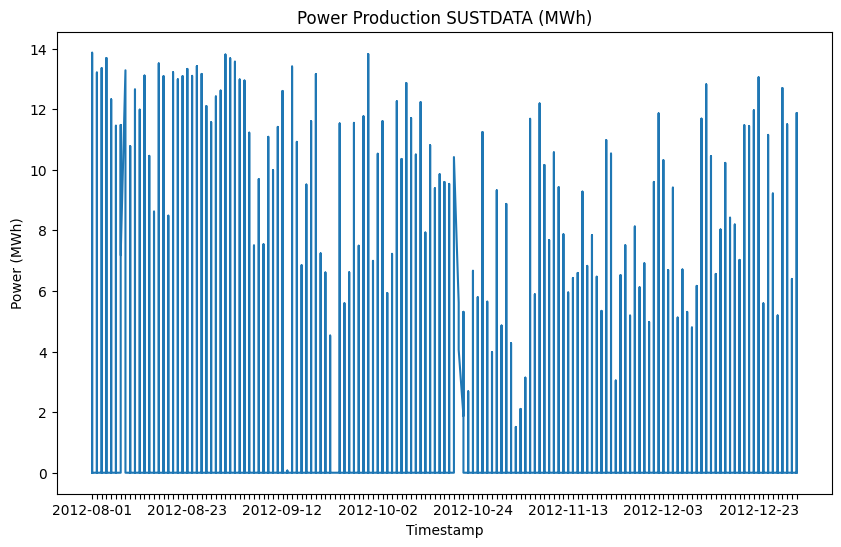

In [338]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged["datetime"], df_merged["solar"], linestyle="-")
plt.title(f"Power Production SUSTDATA (MWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (MWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 20 != 0:
        label.set_visible(False)

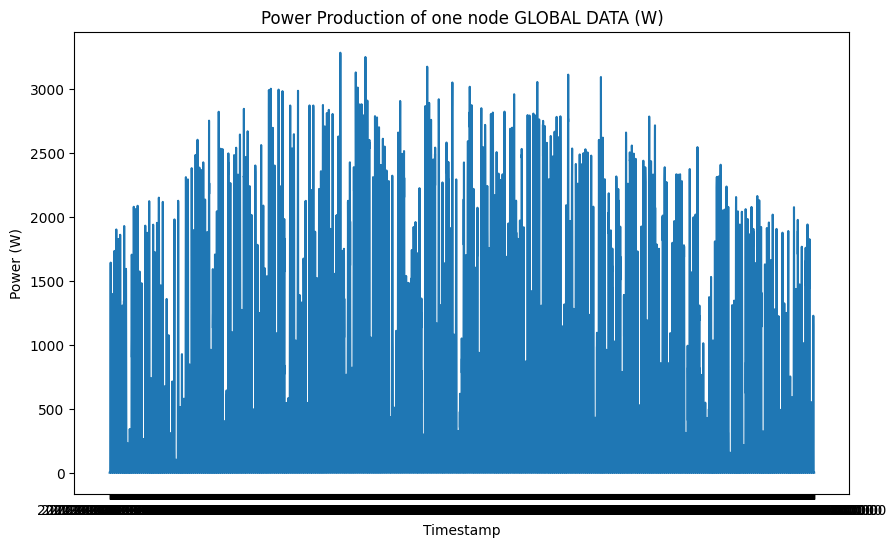

In [339]:
plt.figure(figsize=(10, 6))
plt.plot(df_ref["t_2"], df_ref["DC Array Output (W)"], linestyle="-")
plt.title(f"Power Production of one node GLOBAL DATA (W)")
plt.xlabel("Timestamp")
plt.ylabel("Power (W)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 50 != 0:
        label.set_visible(False)

In [340]:
mean_all = df_merged['solar'].mean()*1e6
mean_one = df_ref['DC Array Output (W)'].mean()

print("de todos (W): " + str(mean_all) +  ", de uno (W): " + str(mean_one))
print("nº nodos media: " + str(mean_all/mean_one))

de todos (W): 2417981.690276573, de uno (W): 530.4314433789955
nº nodos media: 4558.518768935262


### Cálculo final de producción y diferencia por nodo 

#### SUSTDATA

In [341]:
df_merged1 = pd.merge(df_prod, df_cons, on=['datetime', 'h'], how='inner')
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
0,NaN,2010-10-31,NaN,NaN,25,NaT
1,NaN,2010-10-31,NaN,NaN,25,NaT
2,NaN,2010-10-31,NaN,NaN,25,NaT
3,NaN,2010-10-31,NaN,NaN,25,NaT
4,NaN,2010-10-31,NaN,NaN,25,NaT


In [342]:
df_merged1 = df_merged1.dropna() 
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00


In [343]:
df_merged1['dif'] = (df_merged1['solar']*1000/10) - df_merged1['Pavg']  
df_merged1.head()

,solar,datetime,h,Pavg,iid,timestamp,dif
192,0.0,2012-08-01,0.0,164.495763,25,2012-08-01 00:00:00,-164.495763
193,0.0,2012-08-01,1.0,129.631658,25,2012-08-01 01:00:00,-129.631658
194,0.0,2012-08-01,2.0,125.548683,25,2012-08-01 02:00:00,-125.548683
195,0.0,2012-08-01,3.0,145.556332,25,2012-08-01 03:00:00,-145.556332
196,0.0,2012-08-01,4.0,149.209872,25,2012-08-01 04:00:00,-149.209872


In [344]:
max_solar = df_merged1[df_merged1['dif'] < -3000]
max_solar.head()

,solar,datetime,h,Pavg,iid,timestamp,dif
613,2.7785,2012-08-21,19.0,3797.490450,25,2012-08-21 19:00:00,-3519.640450
949,0.2025,2012-09-04,20.0,3620.867833,25,2012-09-04 20:00:00,-3600.617833
1036,6.3485,2012-09-08,11.0,3969.474483,25,2012-09-08 11:00:00,-3334.624483
1037,6.4995,2012-09-08,12.0,4056.168700,25,2012-09-08 12:00:00,-3406.218700
1117,0.0865,2012-09-11,20.0,3282.501117,25,2012-09-11 20:00:00,-3273.851117


#### GLOBAL DATA

In [345]:
df_ref['timestamp'] = df_ref['t_3']
df_ref.head()

,Month,Day,Hour,Beam Irradiance (W/m2),Diffuse Irradiance (W/m2),Ambient Temperature (C),Wind Speed (m/s),Albedo,Plane of Array Irradiance (W/m2),Cell Temperature (C),DC Array Output (W),AC System Output (W),t_0,t_1,t_2,t_3,t_4,timestamp
0,1,1,0,0,0,14.2,0.0,0.2,0.0,14.2,0.0,0.0,2010-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2013-01-01 00:00:00
1,1,1,1,0,0,14.0,0.0,0.2,0.0,14.0,0.0,0.0,2010-01-01 01:00:00,2011-01-01 01:00:00,2012-01-01 01:00:00,2013-01-01 01:00:00,2014-01-01 01:00:00,2013-01-01 01:00:00
2,1,1,2,0,0,13.7,0.0,0.2,0.0,13.7,0.0,0.0,2010-01-01 02:00:00,2011-01-01 02:00:00,2012-01-01 02:00:00,2013-01-01 02:00:00,2014-01-01 02:00:00,2013-01-01 02:00:00
3,1,1,3,0,0,13.5,0.0,0.2,0.0,13.5,0.0,0.0,2010-01-01 03:00:00,2011-01-01 03:00:00,2012-01-01 03:00:00,2013-01-01 03:00:00,2014-01-01 03:00:00,2013-01-01 03:00:00
4,1,1,4,0,0,13.2,0.0,0.2,0.0,13.2,0.0,0.0,2010-01-01 04:00:00,2011-01-01 04:00:00,2012-01-01 04:00:00,2013-01-01 04:00:00,2014-01-01 04:00:00,2013-01-01 04:00:00


In [347]:
df_cons.head()

,Pavg,iid,datetime,h,timestamp
0,2524.484150,25,2013-04-06,0.0,2013-04-06 00:00:00
1,300.692617,25,2013-04-06,1.0,2013-04-06 01:00:00
2,232.383467,25,2013-04-06,2.0,2013-04-06 02:00:00
3,220.126917,25,2013-04-06,3.0,2013-04-06 03:00:00
4,217.004100,25,2013-04-06,4.0,2013-04-06 04:00:00


In [346]:
df_merged2 = pd.merge(df_ref, df_cons, on=['timestamp'], how='inner')
df_merged2.head()

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'timestamp'. If you wish to proceed you should use pd.concat

#### COMPARACIÓN RESULTADOS

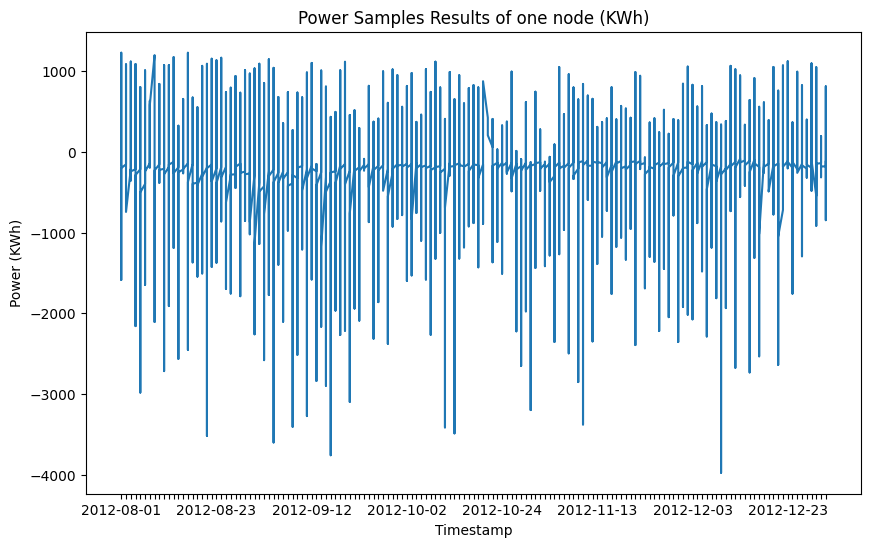

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_merged["datetime"], df_merged["dif1"], linestyle="-")
plt.title(f"Power Samples Results of one node SUSTDATA (KWh)")
plt.xlabel("Timestamp")
plt.ylabel("Power (KWh)")
for n, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % 20 != 0:
        label.set_visible(False)